# Testing Elbow method for different image sizes

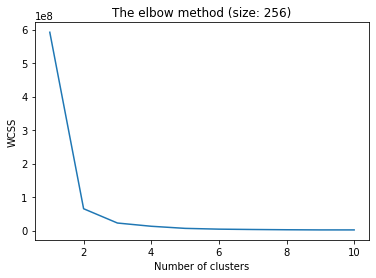

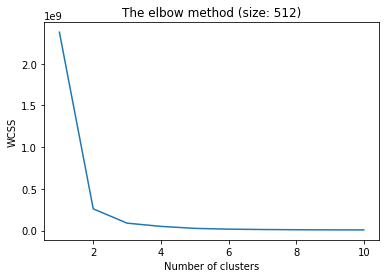

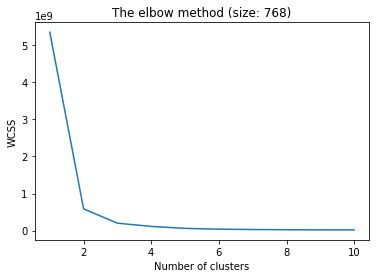

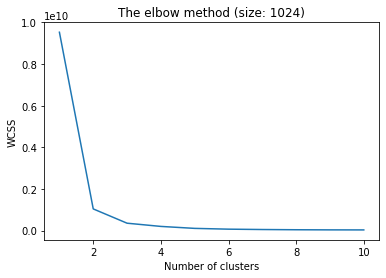

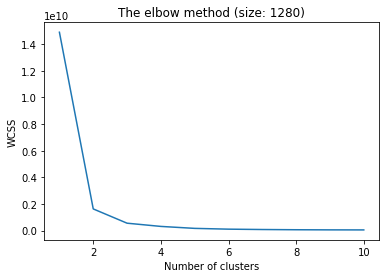

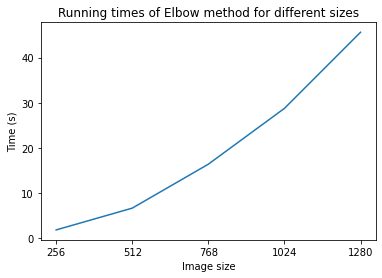

In [1]:
from matplotlib import pyplot as plt
import commonmethods.image_modification as im
import numpy as np
import cv2
import time

size_values = [256, 512, 768, 1024, 1280]
image = im.load_image_grayscale("5")
times = []

for size in size_values:
    resized_image = im.resize_image(image, size)
    wcss = []   #within cluster sum of squares

    pixel_values = resized_image.reshape((-1, 1))
    start = time.time()
    for k in range(1, 11):
        compactness, _, _ = im.kmeans_segmentation(pixel_values, k)
        wcss.append(compactness)
    end = time.time()

    e_time = end-start
    times.append(e_time)

    plt.plot(range(1, 11), wcss)
    plt.title('The elbow method (size: %i)' % size)
    plt.xlabel('Number of clusters')
    plt.ylabel('WCSS') #within cluster sum of squares
    plt.show()
    
default_x_ticks = range(len(size_values))

plt.title('Running times of Elbow method for different sizes')

plt.plot(times)

plt.xticks(default_x_ticks, size_values)

plt.xlabel("Image size")
plt.ylabel("Time (s)")

plt.show()

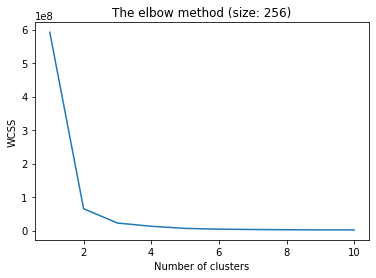

[592111692.9926517, 65040175.1316469, 22368431.527994625, 12704374.3470667, 6421002.76674933, 4082268.407918822, 3032282.868599031, 2298739.9240451395, 1949242.834958173, 1798242.6028611762]


In [2]:
import commonmethods.image_modification as im

resized_image = im.resize_image(image, 256)
wcss = []   #within cluster sum of squares

pixel_values = resized_image.reshape((-1, 1))

for k in range(1, 11):
    compactness, _, _ = im.kmeans_segmentation(pixel_values, k)
    wcss.append(compactness)

plt.plot(range(1, 11), wcss)
plt.title('The elbow method (size: 256)')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') #within cluster sum of squares
plt.show()

print(wcss)